In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the data to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the images
x_train = x_train.reshape((x_train.shape[0], -1))  # (50000, 3072)
x_test = x_test.reshape((x_test.shape[0], -1))

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 42s 0us/step 


In [3]:
def plot_history(history, title=""):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
313/313 - 13s - 40ms/step - accuracy: 0.3148 - loss: 1.9085 - val_accuracy: 0.3615 - val_loss: 1.7797
Epoch 2/50
313/313 - 20s - 63ms/step - accuracy: 0.3910 - loss: 1.7023 - val_accuracy: 0.3907 - val_loss: 1.7004
Epoch 3/50
313/313 - 11s - 34ms/step - accuracy: 0.4207 - loss: 1.6241 - val_accuracy: 0.3995 - val_loss: 1.6753
Epoch 4/50
313/313 - 11s - 34ms/step - accuracy: 0.4410 - loss: 1.5648 - val_accuracy: 0.4454 - val_loss: 1.5774
Epoch 5/50
313/313 - 20s - 64ms/step - accuracy: 0.4556 - loss: 1.5222 - val_accuracy: 0.4467 - val_loss: 1.5473
Epoch 6/50
313/313 - 11s - 34ms/step - accuracy: 0.4729 - loss: 1.4771 - val_accuracy: 0.4588 - val_loss: 1.5363
Epoch 7/50
313/313 - 9s - 30ms/step - accuracy: 0.4877 - loss: 1.4433 - val_accuracy: 0.4554 - val_loss: 1.5189
Epoch 8/50
313/313 - 11s - 34ms/step - accuracy: 0.4990 - loss: 1.4114 - val_accuracy: 0.4675 - val_loss: 1.4918
Epoch 9/50
313/313 - 10s - 33ms/step - accuracy: 0.5041 - loss: 1.3843 - val_accuracy: 0.4627 - v

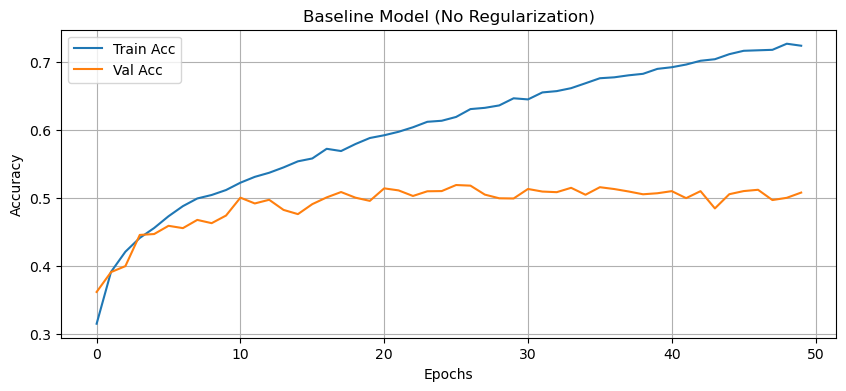

In [4]:
# Baseline model: Dense layers only
def build_baseline_model():
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(3072,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

baseline_model = build_baseline_model()
history_baseline = baseline_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

plot_history(history_baseline, "Baseline Model (No Regularization)")

Interpretation
This is a classic sign of overfitting:

The training accuracy (71.85%) is much higher than your validation accuracy (51.12%).
The training loss (0.78) is much lower than your validation loss (1.71).
The model is learning to memorize the training set but is not generalizing to unseen data.

Epoch 1/50
313/313 - 14s - 46ms/step - accuracy: 0.1940 - loss: 2.1571 - val_accuracy: 0.2772 - val_loss: 1.9968
Epoch 2/50
313/313 - 11s - 36ms/step - accuracy: 0.2327 - loss: 2.0309 - val_accuracy: 0.3189 - val_loss: 1.9392
Epoch 3/50
313/313 - 21s - 66ms/step - accuracy: 0.2468 - loss: 2.0001 - val_accuracy: 0.3118 - val_loss: 1.9474
Epoch 4/50
313/313 - 11s - 35ms/step - accuracy: 0.2590 - loss: 1.9731 - val_accuracy: 0.2934 - val_loss: 1.9517
Epoch 5/50
313/313 - 11s - 34ms/step - accuracy: 0.2580 - loss: 1.9635 - val_accuracy: 0.3296 - val_loss: 1.9086
Epoch 6/50
313/313 - 21s - 68ms/step - accuracy: 0.2662 - loss: 1.9490 - val_accuracy: 0.3232 - val_loss: 1.9397
Epoch 7/50
313/313 - 9s - 29ms/step - accuracy: 0.2743 - loss: 1.9359 - val_accuracy: 0.3162 - val_loss: 1.9264
Epoch 8/50
313/313 - 11s - 34ms/step - accuracy: 0.2763 - loss: 1.9366 - val_accuracy: 0.3431 - val_loss: 1.9221
Epoch 9/50
313/313 - 11s - 34ms/step - accuracy: 0.2755 - loss: 1.9311 - val_accuracy: 0.3247 - v

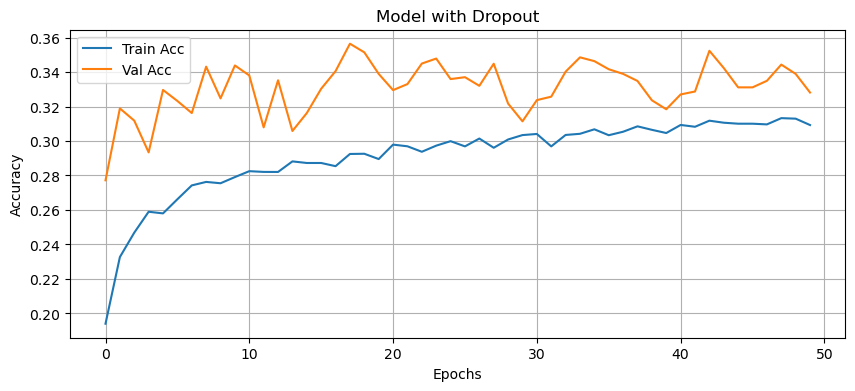

In [5]:
# Model with Dropout
def build_dropout_model():
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(3072,)),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

dropout_model = build_dropout_model()
history_dropout = dropout_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

plot_history(history_dropout, "Model with Dropout")

Epoch 1/50
313/313 - 13s - 41ms/step - accuracy: 0.1834 - loss: 2.1843 - val_accuracy: 0.2703 - val_loss: 1.9892
Epoch 2/50
313/313 - 11s - 35ms/step - accuracy: 0.2251 - loss: 2.0464 - val_accuracy: 0.3044 - val_loss: 1.9498
Epoch 3/50
313/313 - 20s - 64ms/step - accuracy: 0.2434 - loss: 2.0016 - val_accuracy: 0.3118 - val_loss: 1.9408
Epoch 4/50
313/313 - 11s - 35ms/step - accuracy: 0.2524 - loss: 1.9821 - val_accuracy: 0.3088 - val_loss: 1.9283
Epoch 5/50
313/313 - 10s - 33ms/step - accuracy: 0.2633 - loss: 1.9668 - val_accuracy: 0.3306 - val_loss: 1.9228
Epoch 6/50
313/313 - 21s - 68ms/step - accuracy: 0.2688 - loss: 1.9479 - val_accuracy: 0.3261 - val_loss: 1.9139
Epoch 7/50
313/313 - 10s - 33ms/step - accuracy: 0.2729 - loss: 1.9459 - val_accuracy: 0.3256 - val_loss: 1.9236
Epoch 8/50
313/313 - 10s - 31ms/step - accuracy: 0.2797 - loss: 1.9233 - val_accuracy: 0.3324 - val_loss: 1.9081
Epoch 9/50
313/313 - 10s - 33ms/step - accuracy: 0.2754 - loss: 1.9344 - val_accuracy: 0.3256 - 

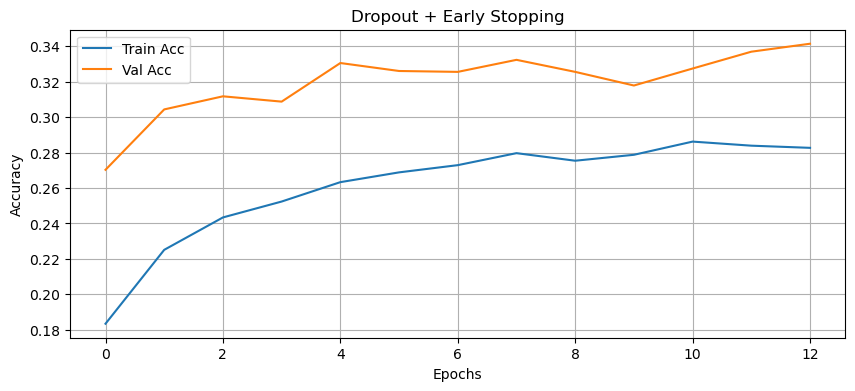

Best Epoch: 8


In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

dropout_es_model = build_dropout_model()
history_dropout_es = dropout_es_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

plot_history(history_dropout_es, "Dropout + Early Stopping")
print(f"Best Epoch: {np.argmin(history_dropout_es.history['val_loss']) + 1}")

Epoch 1/50
313/313 - 14s - 45ms/step - accuracy: 0.3080 - loss: 2.5369 - val_accuracy: 0.3234 - val_loss: 2.1990
Epoch 2/50
313/313 - 19s - 61ms/step - accuracy: 0.3792 - loss: 1.9901 - val_accuracy: 0.3609 - val_loss: 1.9786
Epoch 3/50
313/313 - 9s - 29ms/step - accuracy: 0.4013 - loss: 1.8410 - val_accuracy: 0.4251 - val_loss: 1.7864
Epoch 4/50
313/313 - 12s - 38ms/step - accuracy: 0.4222 - loss: 1.7556 - val_accuracy: 0.4042 - val_loss: 1.8017
Epoch 5/50
313/313 - 10s - 33ms/step - accuracy: 0.4315 - loss: 1.7065 - val_accuracy: 0.4499 - val_loss: 1.6942
Epoch 6/50
313/313 - 22s - 71ms/step - accuracy: 0.4461 - loss: 1.6593 - val_accuracy: 0.4429 - val_loss: 1.6933
Epoch 7/50
313/313 - 11s - 36ms/step - accuracy: 0.4591 - loss: 1.6261 - val_accuracy: 0.4368 - val_loss: 1.6789
Epoch 8/50
313/313 - 20s - 65ms/step - accuracy: 0.4642 - loss: 1.6078 - val_accuracy: 0.4354 - val_loss: 1.7361
Epoch 9/50
313/313 - 9s - 29ms/step - accuracy: 0.4658 - loss: 1.5952 - val_accuracy: 0.4546 - va

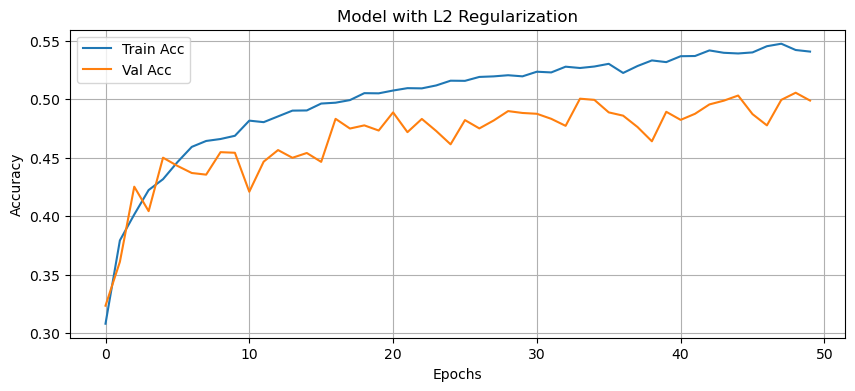

In [7]:
# Model with L2 regularization
def build_l2_model():
    model = models.Sequential([
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(3072,)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

l2_model = build_l2_model()
history_l2 = l2_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

plot_history(history_l2, "Model with L2 Regularization")

Epoch 1/50
313/313 - 22s - 70ms/step - accuracy: 0.2974 - loss: 1.9303 - val_accuracy: 0.3212 - val_loss: 1.8577
Epoch 2/50
313/313 - 21s - 67ms/step - accuracy: 0.3818 - loss: 1.7162 - val_accuracy: 0.3744 - val_loss: 1.7828
Epoch 3/50
313/313 - 21s - 67ms/step - accuracy: 0.4110 - loss: 1.6394 - val_accuracy: 0.4187 - val_loss: 1.6244
Epoch 4/50
313/313 - 21s - 66ms/step - accuracy: 0.4386 - loss: 1.5680 - val_accuracy: 0.4351 - val_loss: 1.5944
Epoch 5/50
313/313 - 21s - 66ms/step - accuracy: 0.4539 - loss: 1.5206 - val_accuracy: 0.4654 - val_loss: 1.5196
Epoch 6/50
313/313 - 39s - 126ms/step - accuracy: 0.4701 - loss: 1.4784 - val_accuracy: 0.4598 - val_loss: 1.5353
Epoch 7/50
313/313 - 20s - 65ms/step - accuracy: 0.4825 - loss: 1.4429 - val_accuracy: 0.4538 - val_loss: 1.5367
Epoch 8/50
313/313 - 21s - 67ms/step - accuracy: 0.4934 - loss: 1.4134 - val_accuracy: 0.4749 - val_loss: 1.4863
Epoch 9/50
313/313 - 20s - 63ms/step - accuracy: 0.5054 - loss: 1.3797 - val_accuracy: 0.4752 -

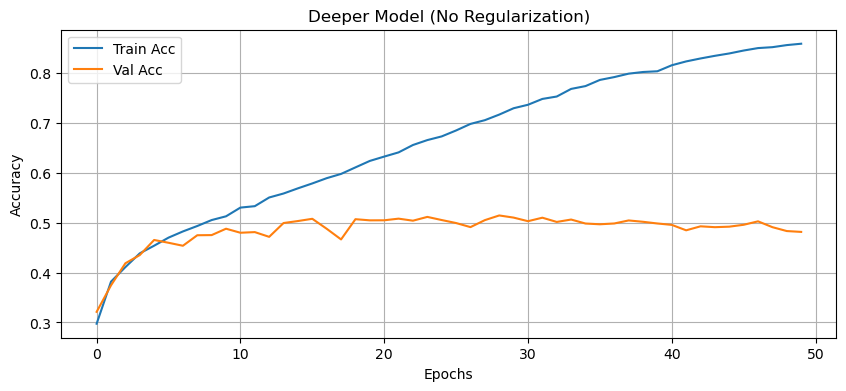

In [8]:
# Deeper model
def build_deep_model():
    model = models.Sequential([
        layers.Dense(1024, activation='relu', input_shape=(3072,)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

deep_model = build_deep_model()
history_deep = deep_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

plot_history(history_deep, "Deeper Model (No Regularization)")

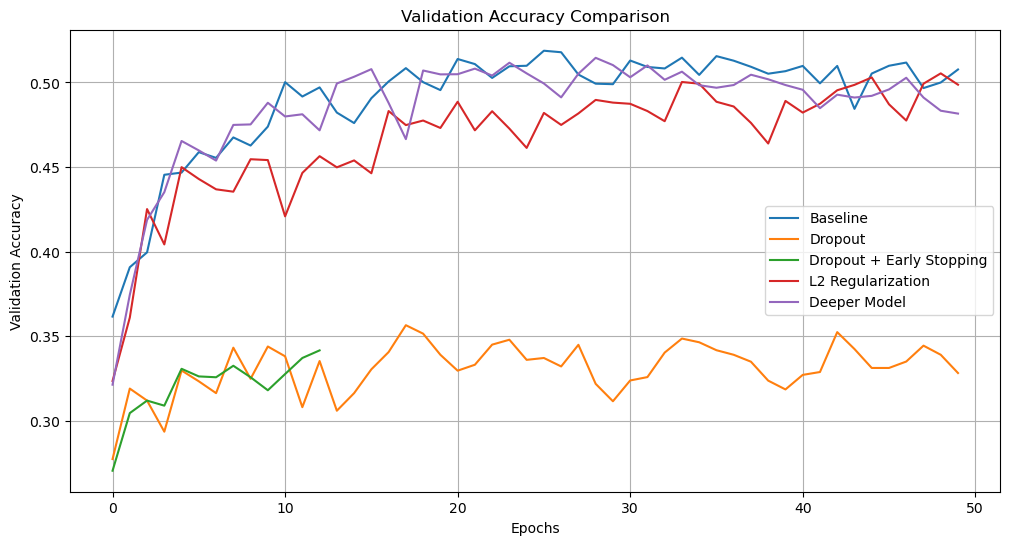

In [9]:
models_histories = {
    "Baseline": history_baseline,
    "Dropout": history_dropout,
    "Dropout + Early Stopping": history_dropout_es,
    "L2 Regularization": history_l2,
    "Deeper Model": history_deep
}

plt.figure(figsize=(12, 6))
for name, history in models_histories.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

def build_improved_dense_model():
    model = models.Sequential([
        layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(3072,)),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# EarlyStopping to prevent over-training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Build and train the improved model
improved_model = build_improved_dense_model()
history_improved = improved_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/50
313/313 - 38s - 121ms/step - accuracy: 0.2415 - loss: 3.0557 - val_accuracy: 0.3208 - val_loss: 2.3148
Epoch 2/50
313/313 - 30s - 96ms/step - accuracy: 0.3127 - loss: 2.1705 - val_accuracy: 0.3449 - val_loss: 2.0197
Epoch 3/50
313/313 - 30s - 97ms/step - accuracy: 0.3176 - loss: 2.0250 - val_accuracy: 0.3388 - val_loss: 1.9767
Epoch 4/50
313/313 - 42s - 133ms/step - accuracy: 0.3265 - loss: 1.9537 - val_accuracy: 0.3703 - val_loss: 1.8719
Epoch 5/50
313/313 - 41s - 131ms/step - accuracy: 0.3330 - loss: 1.9228 - val_accuracy: 0.3501 - val_loss: 1.8711
Epoch 6/50
313/313 - 31s - 100ms/step - accuracy: 0.3355 - loss: 1.9015 - val_accuracy: 0.3813 - val_loss: 1.8388
Epoch 7/50
313/313 - 41s - 130ms/step - accuracy: 0.3444 - loss: 1.8772 - val_accuracy: 0.3543 - val_loss: 1.8454
Epoch 8/50
313/313 - 155s - 495ms/step - accuracy: 0.3509 - loss: 1.8692 - val_accuracy: 0.3756 - val_loss: 1.8527
Epoch 9/50
313/313 - 30s - 96ms/step - accuracy: 0.3516 - loss: 1.8660 - val_accuracy: 0.

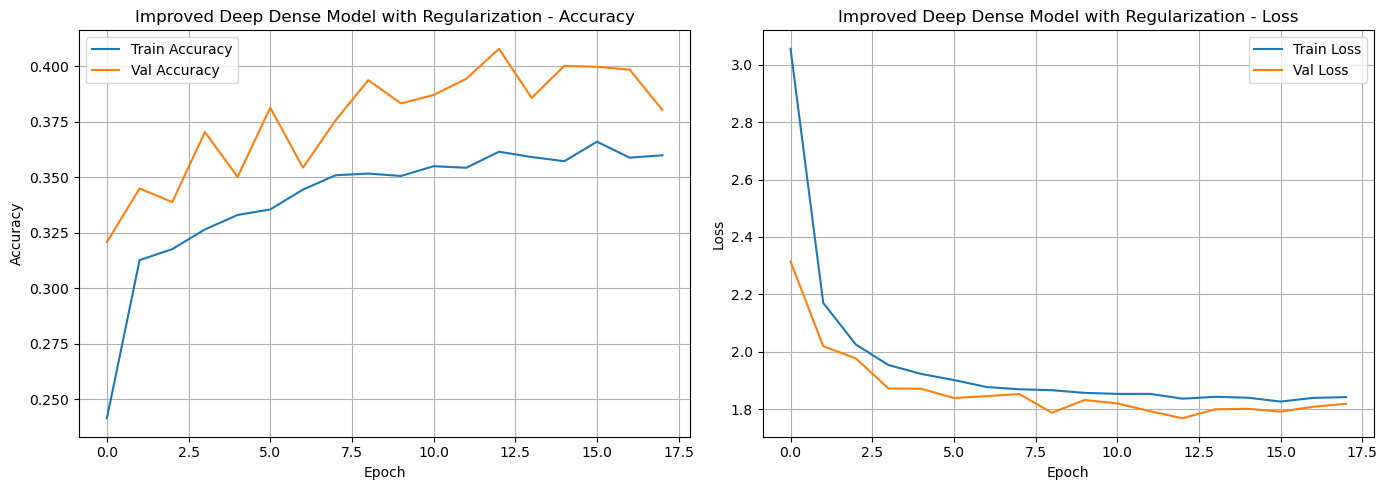

In [11]:
def plot_history(history, title):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_history(history_improved, "Improved Deep Dense Model with Regularization")